In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os

from tensorflow.keras.layers import (Conv2D,MaxPool2D, Dropout,Flatten, Dense, Input)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential,Model, model_from_json, load_model

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image, display

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 4s 0us/step


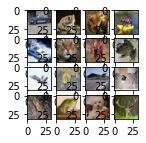

In [ ]:
fig = plt.figure(figsize=(2,2))
rows,cols = 4,4

for j in range(0,cols*rows):
  fig.add_subplot(rows,cols,j+1)
  plt.imshow(x_train[10000+j])

plt.show()

In [ ]:
y_train_new = y_train
y_train_new[(y_train != 1)] = 0
print(np.unique(y_train_new))

y_test_new = y_test
y_test_new[(y_test != 1)] = 0
print(np.unique(y_test_new))


[0 1]
[0 1]


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [ ]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_test_new = tf.keras.utils.to_categorical(y_test_new)

In [ ]:
y_train_new.shape

(50000, 2)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(10,10),activation='relu',input_shape=(32,32,3)))
#adding more layers
model.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 64)        19264     
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 9, 64)          0         
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 128)               663680    
                                                        

In [ ]:
model.fit(x_train,y_train_new,batch_size=4096,epochs=5)

Epoch 1/5
13/13 [==============================] - 374s 29s/step - loss: 0.3851 - accuracy: 0.8451
Epoch 2/5
13/13 [==============================] - 370s 28s/step - loss: 0.3158 - accuracy: 0.9000
Epoch 3/5
13/13 [==============================] - 371s 28s/step - loss: 0.2963 - accuracy: 0.9000
Epoch 4/5
13/13 [==============================] - 372s 29s/step - loss: 0.2802 - accuracy: 0.9000
Epoch 5/5
13/13 [==============================] - 372s 29s/step - loss: 0.2615 - accuracy: 0.9000


In [ ]:
model.evaluate(x_test,y_test_new)

313/313 [==============================] - 23s 74ms/step - loss: 0.2453 - accuracy: 0.9000


[0.24530445039272308, 0.8999999761581421]

In [ ]:
ROOT_PATH = os.getcwd()
print(ROOT_PATH)

DIR_PATH = os.path.join(os.getcwd(),'drive','MyDrive','Datasets','Kaggle','Cars')
print(DIR_PATH)

os.listdir(DIR_PATH)

/content
/content/drive/MyDrive/Datasets/Kaggle/Cars


['north-west',
 'south',
 'south-east',
 'south-west',
 'west',
 'east',
 'north',
 'north-east']

In [ ]:
def load_image_from_directory(PATH):
  img_data = []
  img_label = []
  for folder in os.listdir(PATH):
    for img_name in os.listdir(os.path.join(PATH,folder)):
      img = tf.keras.preprocessing.image.load_img(path= os.path.join(DIR_PATH,folder,img_name),
                                                color_mode = 'rgb',
                                                target_size = (224,224))
      img_array = tf.keras.preprocessing.image.img_to_array(img)
      img_data.append(img_array)
      print(f'{img_name} is Loaded in {folder}')
      img_label.append(folder)

  return img_data,img_label


In [ ]:
train_img_data,y_train = load_image_from_directory(DIR_PATH) 

00212.jpg is Loaded in north-west
00211.jpg is Loaded in north-west
00120.jpg is Loaded in north-west
00109.jpg is Loaded in north-west
00104.jpg is Loaded in north-west
00023.jpg is Loaded in north-west
00040.jpg is Loaded in north-west
00024.jpg is Loaded in north-west
00016.jpg is Loaded in north-west
00042.jpg is Loaded in north-west
00029.jpg is Loaded in north-west
00026.jpg is Loaded in north-west
00044.jpg is Loaded in north-west
00020.jpg is Loaded in north-west
00030.jpg is Loaded in north-west
00001.jpg is Loaded in north-west
00009.jpg is Loaded in north-west
00057.jpg is Loaded in north-west
00058.jpg is Loaded in north-west
00060.jpg is Loaded in north-west
00188.jpg is Loaded in north-west
00082.jpg is Loaded in north-west
00126.jpg is Loaded in north-west
00140.jpg is Loaded in north-west
00143.jpg is Loaded in north-west
00154.jpg is Loaded in north-west
00092.jpg is Loaded in north-west
00108.jpg is Loaded in north-west
00121.jpg is Loaded in north-west
00072.jpg is L

north-west


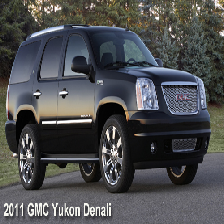

In [ ]:
print(y_train[5])
display(tf.keras.preprocessing.image.array_to_img(train_img_data[5]))

south


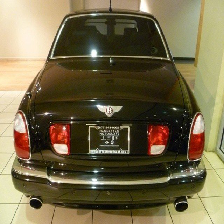

In [ ]:
print(y_train[55])
display(tf.keras.preprocessing.image.array_to_img(train_img_data[55]))

south-east


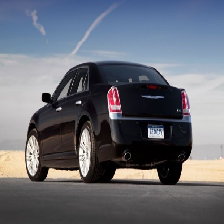

In [ ]:
print(y_train[105])
display(tf.keras.preprocessing.image.array_to_img(train_img_data[105]))

south-west


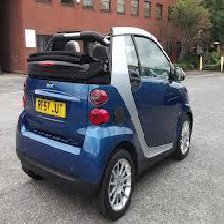

In [ ]:
print(y_train[157])
display(tf.keras.preprocessing.image.array_to_img(train_img_data[157]))

west


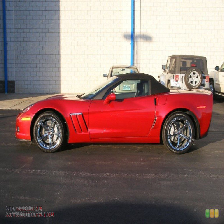

In [ ]:
print(y_train[210])
display(tf.keras.preprocessing.image.array_to_img(train_img_data[210]))

east


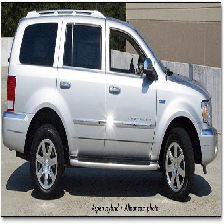

In [ ]:
print(y_train[260])
display(tf.keras.preprocessing.image.array_to_img(train_img_data[260]))

north


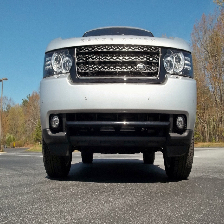

In [ ]:
print(y_train[310])
display(tf.keras.preprocessing.image.array_to_img(train_img_data[310]))

north-east


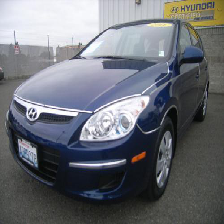

In [ ]:
print(y_train[376])
display(tf.keras.preprocessing.image.array_to_img(train_img_data[376]))

In [ ]:
X_train = np.array(train_img_data).reshape(len(y_train),224,224,3)
X_train = X_train.astype('float32')
print(X_train.shape)

(415, 224, 224, 3)


In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)

print(le.classes_)
y_train_ohe = pd.get_dummies(y_train)
print(y_train_ohe.shape)
print(type(y_train_ohe))

['east' 'north' 'north-east' 'north-west' 'south' 'south-east'
 'south-west' 'west']
(415, 8)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
input_shape = X_train[0].shape
print(input_shape)
num_classes = len(y_train_ohe.columns)
print(num_classes)

y_train_ohe = np.array(y_train_ohe)

(224, 224, 3)
8


In [ ]:
def create_model():

  model = tf.keras.Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
  model.add(Conv2D(32,(3,3),activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(.5))

  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(.5))

  model.add(tf.keras.layers.Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(.5))
  model.add(Dense(num_classes,activation='softmax'))

  return model

In [ ]:
model1 = create_model()

In [ ]:
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 110, 110, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 64)      36928     
                                                      

In [ ]:
model1.fit(X_train,y_train_ohe,batch_size=32,epochs=5)

Epoch 1/5
13/13 [==============================] - 110s 8s/step - loss: 157.6950 - accuracy: 0.1301
Epoch 2/5
13/13 [==============================] - 98s 8s/step - loss: 2.0830 - accuracy: 0.1181
Epoch 3/5
13/13 [==============================] - 103s 8s/step - loss: 2.0855 - accuracy: 0.1277
Epoch 4/5
13/13 [==============================] - 97s 7s/step - loss: 2.1491 - accuracy: 0.1157
Epoch 5/5
13/13 [==============================] - 99s 8s/step - loss: 2.0795 - accuracy: 0.1012


In [ ]:
image_input = Input(shape=(224,224,3))

In [ ]:
model2 = VGG16(input_tensor=image_input,include_top=True,weights='imagenet')

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
last_layer = model2.get_layer('fc2').output
out = Dense(8,activation='softmax',name='output')(last_layer)

In [ ]:
custom_vgg = Model(image_input,out)
custom_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in custom_vgg.layers[:-1]:
  layer.trainable = False

In [ ]:
custom_vgg.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
custom_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
custom_vgg.fit(X_train,y_train_ohe,epochs=5,batch_size=32)

Epoch 1/5
13/13 [==============================] - 235s 18s/step - loss: 2.8909 - accuracy: 0.3157
Epoch 2/5
13/13 [==============================] - 222s 17s/step - loss: 1.2172 - accuracy: 0.5928
Epoch 3/5
13/13 [==============================] - 221s 17s/step - loss: 0.7810 - accuracy: 0.7373
Epoch 4/5
13/13 [==============================] - 221s 17s/step - loss: 0.6657 - accuracy: 0.7663
Epoch 5/5
13/13 [==============================] - 224s 17s/step - loss: 0.5204 - accuracy: 0.8289
